#dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d joaopauloschuler/cifar10-64x64-resized-via-cai-super-resolution

cifar10-64x64-resized-via-cai-super-resolution.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cifar10-64x64-resized-via-cai-super-resolution.zip")
zip_ref.extractall()
zip_ref.close()

# data visualization

In [ ]:
!ls cifar10-64/

test  train


In [ ]:
import os

#walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("cifar10-64"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'cifar10-64'.
there are 10 directories and 0 images in 'cifar10-64/train'.
there are 0 directories and 5000 images in 'cifar10-64/train/class6'.
there are 0 directories and 5000 images in 'cifar10-64/train/class9'.
there are 0 directories and 5000 images in 'cifar10-64/train/class4'.
there are 0 directories and 5000 images in 'cifar10-64/train/class7'.
there are 0 directories and 5000 images in 'cifar10-64/train/class2'.
there are 0 directories and 5000 images in 'cifar10-64/train/class8'.
there are 0 directories and 5000 images in 'cifar10-64/train/class1'.
there are 0 directories and 5000 images in 'cifar10-64/train/class5'.
there are 0 directories and 5000 images in 'cifar10-64/train/class0'.
there are 0 directories and 5000 images in 'cifar10-64/train/class3'.
there are 10 directories and 0 images in 'cifar10-64/test'.
there are 0 directories and 1000 images in 'cifar10-64/test/class6'.
there are 0 directories and 1000 images in 'cifar10-64/t

In [ ]:
#let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory (we will view image from here)
  target_folder = target_dir+target_class

  #get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") #show the shape of the image
  return img


['img30740.png']
Image shape:(64, 64, 3)


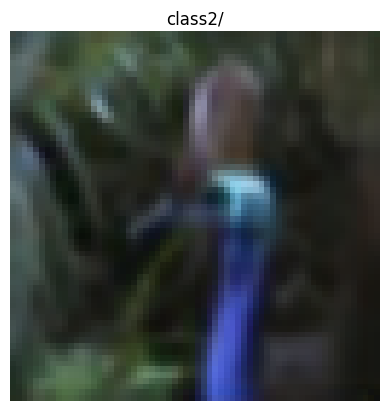

In [ ]:
img = view_random_image(target_dir="cifar10-64/train/",
                        target_class="class2/")

# train and test data

In [ ]:
!ls cifar10-64/

test  train


In [ ]:
train_dir = "/content/cifar10-64/train"
test_dir = "/content/cifar10-64/test"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['class0' 'class1' 'class2' 'class3' 'class4' 'class5' 'class6' 'class7'
 'class8' 'class9']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='categorical')

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(64, 64),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 50000 images belonging to 10 classes.


# model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(64, 64, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history = model.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 126s 78ms/step - loss: 1.8389 - accuracy: 0.3271 - val_loss: 1.5112 - val_accuracy: 0.4647
Epoch 2/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.6366 - accuracy: 0.4087 - val_loss: 1.4719 - val_accuracy: 0.4722
Epoch 3/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5537 - accuracy: 0.4388 - val_loss: 1.4835 - val_accuracy: 0.4703
Epoch 4/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4929 - accuracy: 0.4613 - val_loss: 1.3332 - val_accuracy: 0.5287
Epoch 5/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4573 - accuracy: 0.4754 - val_loss: 1.2855 - val_accuracy: 0.5420
Epoch 6/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4325 - accuracy: 0.4836 - val_loss: 1.2530 - val_accuracy: 0.5547
Epoch 7/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4064 - accuracy: 0.4980 - val_loss: 1

In [ ]:
# plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epoch did we ran for?

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

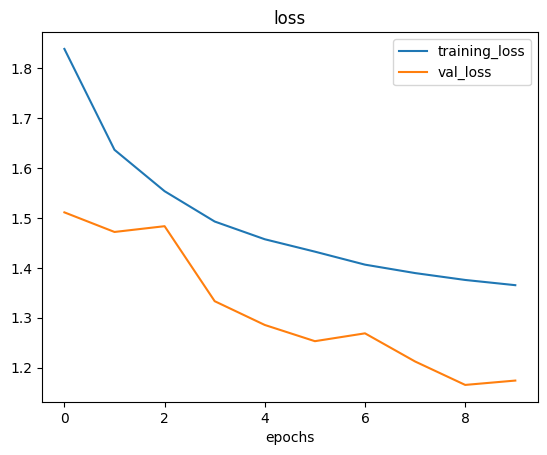

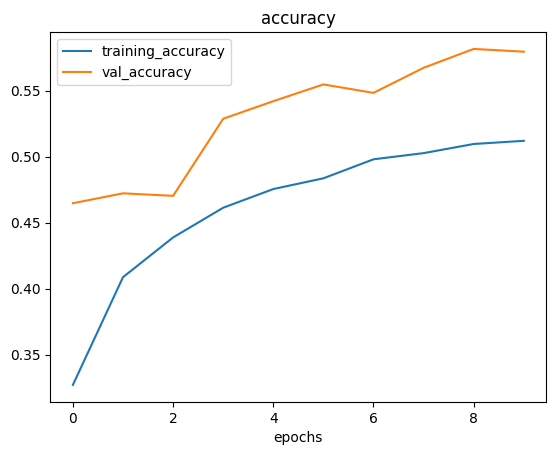

In [ ]:
plot_loss_curves(history)

In [ ]:
model.evaluate(test_data)

313/313 [==============================] - 8s 25ms/step - loss: 1.1741 - accuracy: 0.5795


[1.1740520000457764, 0.5795000195503235]

#predict

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

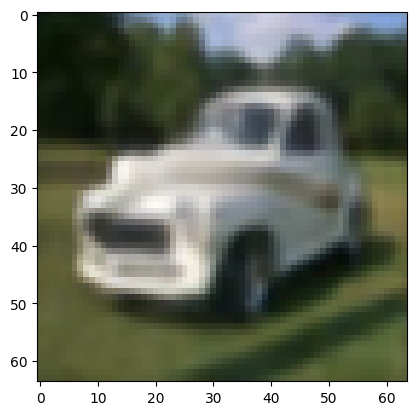

In [ ]:
img = plt.imread('/content/cifar10-64/test/class1/img1005.png')
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(64, 64, 3)

In [ ]:
import cv2

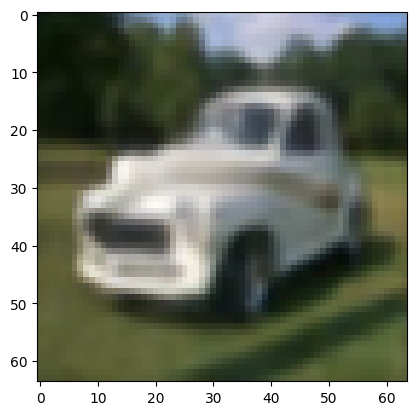

In [ ]:
img = cv2.resize(img,(64,64))
plt.imshow(img)
plt.show()

In [ ]:
img = img.reshape(1,64,64,3)

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 180ms/step


array([[4.9206931e-03, 7.1189982e-01, 1.5725770e-03, 2.9753093e-03,
        2.1469277e-04, 8.5101975e-03, 9.4042538e-04, 5.4853112e-03,
        1.5448592e-02, 2.4803232e-01]], dtype=float32)